In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 

In [2]:
from src.abstract_mdp.abs_mdp import AbstractMDP
from src.abstract_mdp.abs_mdp_vae import AbstractMDPTrainer

In [3]:
def predict_next_states(mdp, states, actions, executed):
    next_s = []
    next_z = []
    for action in actions:
        actions_ = action * torch.ones(states.shape[0])
        z = mdp.encoder(states)
        next_z_ = mdp.transition(z, actions_.long(), executed)
        next_s.append(mdp.ground(next_z_))
        next_z.append(next_z_)
    return next_s, next_z

In [4]:
def states_to_plot(states, n_grids=10):
    return torch.round(n_grids * states)

In [5]:
def test_grounding(mdp, states):
    z = mdp.encoder(states)
    s = mdp.ground(z)
    return s, z

Arguments

In [6]:
n_samples = 1000

Load

In [7]:
path_to_config = '/users/rrodri19/abs-mdp/experiments/pb_no_obs/fullstate/config/config.yaml'
trial = 64
chk_path = '/users/rrodri19/abs-mdp/experiments/pb_no_obs/fullstate/mdps/0/lightning_logs/version_8083955/checkpoints/epoch=9-step=5629.ckpt'
cfg = AbstractMDPTrainer.load_config(path_to_config)
model = AbstractMDPTrainer.load_from_checkpoint(chk_path)

model.data_cfg.data_path = '../' + model.data_cfg.data_path
model.prepare_data()

mdp = AbstractMDP(model, model.pinball_test)

plot initial state distribution

In [8]:
states = list(mdp.get_initial_states(n_samples))
states = torch.stack(states)
executed = torch.ones(n_samples) # TODO check that this flag is correct in dataset
# plot effect of each option

In [9]:
actions = mdp.get_actions()
s = states_to_plot(states)

In [10]:
next_states, next_z = predict_next_states(mdp, s/10, actions, executed)

plot in subplots the effect of each action

In [11]:
reconstructed_s, z = test_grounding(mdp, states)
grounded_init_states = states_to_plot(reconstructed_s)

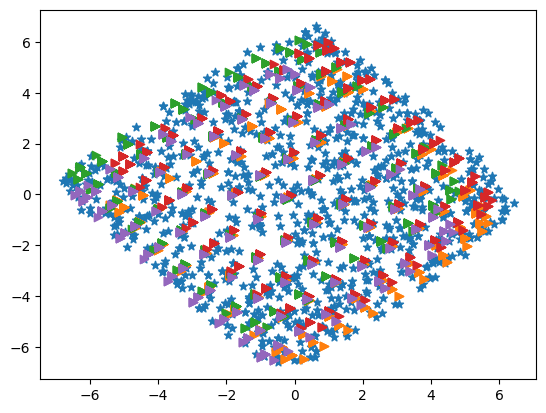

In [12]:
plt.figure()
plt.scatter(z[:, 0], z[:, 1], marker='*')
for action in range(4):
    plt.scatter(next_z[action][:,0], next_z[action][:,1], marker='>')

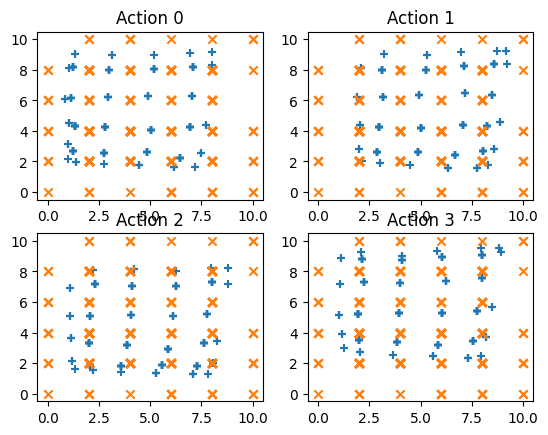

In [13]:
plt.figure()
for action in range(mdp.n_options):
    ax = plt.subplot(2,2, action+1)
    # next_s = states_to_plot(next_states[action])
    next_s = next_states[action]
    idx = (s[:, 0] % 2 == 0) * (s[:, 1] % 2 == 0) 
    ax.set_title(f"Action {action}")
    plt.scatter(next_s[idx, 0]*10, next_s[idx, 1]*10, marker='+')
    plt.scatter(s[idx, 0], s[idx, 1], marker='x')
    # plt.scatter(grounded_init_states[idx, 0], grounded_init_states[idx, 1])

In [14]:
plt.show()